# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [7]:
df = pd.read_csv("Dados/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# Exploração Inicial

In [8]:
# Entendendo as colunas e o número de registros
print(df.info())
print(f'\nQuantidade de marcas: {df['Marca'].value_counts().count()}\n')

# CATEGORIAS
print(df['Categoria'].value_counts())
print(f'\nQuantidade de categorias: {df['Categoria'].value_counts().count()}')

<class 'pandas.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   title           1107 non-null   str  
 1   Marca           1107 non-null   str  
 2   Preco_Normal    1107 non-null   int64
 3   Preco_Desconto  1107 non-null   int64
 4   Preco_Anterior  1107 non-null   int64
 5   Desconto        1107 non-null   int64
 6   Categoria       1107 non-null   str  
dtypes: int64(4), str(3)
memory usage: 60.7 KB
None

Quantidade de marcas: 156

Categoria
lacteos                       447
belleza-y-cuidado-personal    239
congelados                    235
verduras                       64
instantaneos-y-sopas           57
comidas-preparadas             46
frutas                         19
Name: count, dtype: int64

Quantidade de categorias: 7


# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [9]:
#Seu código aqui para a média
media_precos_normais = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
print(media_precos_normais)

                    Categoria  Preco_Normal
1          comidas-preparadas   3095.043478
5                     lacteos   2385.219239
2                  congelados   2108.042553
0  belleza-y-cuidado-personal   1783.556485
3                      frutas   1724.473684
6                    verduras   1343.296875
4        instantaneos-y-sopas    765.491228


In [10]:
#Seu código aqui para a mediana
mediana_precos_normais = df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
print(mediana_precos_normais)

                    Categoria  Preco_Normal
1          comidas-preparadas        3290.0
0  belleza-y-cuidado-personal        1569.0
2                  congelados        1519.0
3                      frutas        1195.0
6                    verduras        1180.0
5                     lacteos         989.0
4        instantaneos-y-sopas         439.0


Comparando diretamente...

In [20]:
# RENOMEANDO AS COLUNAS DE VALORES
media_precos_normais.rename(columns = {'Preco_Normal': 'Media Preço'}, inplace = True)
mediana_precos_normais.rename(columns = {'Preco_Normal': 'Mediana Preço'}, inplace = True)

# JUNTANDO TUDO PARA COMPARAÇÃO
# media_precos_normais = media_precos_normais.merge(mediana_precos_normais, on = 'Categoria')

print(media_precos_normais)

                    Categoria  Media Preço  Mediana Preço
0          comidas-preparadas  3095.043478         3290.0
1                     lacteos  2385.219239          989.0
2                  congelados  2108.042553         1519.0
3  belleza-y-cuidado-personal  1783.556485         1569.0
4                      frutas  1724.473684         1195.0
5                    verduras  1343.296875         1180.0
6        instantaneos-y-sopas   765.491228          439.0


Digite aqui as categorias:
* instantaneos-y-sopas
* comidas-preparadas
* lacteos
* congelados
* belleza-y-cuidado-personal
* frutas
* verduras



# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [21]:
#Seu código aqui
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by = 'Preco_Normal', ascending = False)

# RENOMEANDO A COLUNA PREÇO NORMAL
desvio_padrao_por_categoria.rename(columns = {'Preco_Normal': 'Desvio Padrão'}, inplace = True)


# JUNTANDO A VISUALIZAÇÃO COM A MÉDIA E MEDIANA
#media_precos_normais = media_precos_normais.merge(desvio_padrao_por_categoria, on = 'Categoria')

# ARREDONDANDO OS VALORES
media_precos_normais[['Media Preço', 'Mediana Preço', 'Desvio Padrão']] = media_precos_normais[['Media Preço', 'Mediana Preço', 'Desvio Padrão']].round(1)

# CALCULANDO A DIFERENÇA DA MÉDIA PARA A MEDIANA
media_precos_normais['Dif. Média Mediana[%]'] = ((1 - (media_precos_normais['Media Preço'] / media_precos_normais['Mediana Preço'])) * 100).round(1)
# media_precos_normais.drop(['Dif. Média Mediana'], axis = 1, inplace = True)

# VISUALIZANDO
print(media_precos_normais.sort_values(by = 'Desvio Padrão', ascending = False).to_string())



                    Categoria  Media Preço  Mediana Preço  Desvio Padrão  Dif. Média Mediana[%]
1                     lacteos       2385.2          989.0         3925.8                 -141.2
3  belleza-y-cuidado-personal       1783.6         1569.0         2210.0                  -13.7
2                  congelados       2108.0         1519.0         2111.5                  -38.8
0          comidas-preparadas       3095.0         3290.0         2019.9                    5.9
4                      frutas       1724.5         1195.0         1639.2                  -44.3
6        instantaneos-y-sopas        765.5          439.0         1170.2                  -74.4
5                    verduras       1343.3         1180.0         1012.7                  -13.8


Digite nesse campo o comportamento que você identificou.

R: É possível notar que há uma diferença muito grande entre a média e a mediana quando o desvio padrão possui um valor muito maior que a média


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

Quantidade de registros: 447

Valor médio: 2385.2

Quantidade de valores acima da média: 54

Quantidade de valores abaixo de zero: 0



Text(0, 0.5, 'Valor')

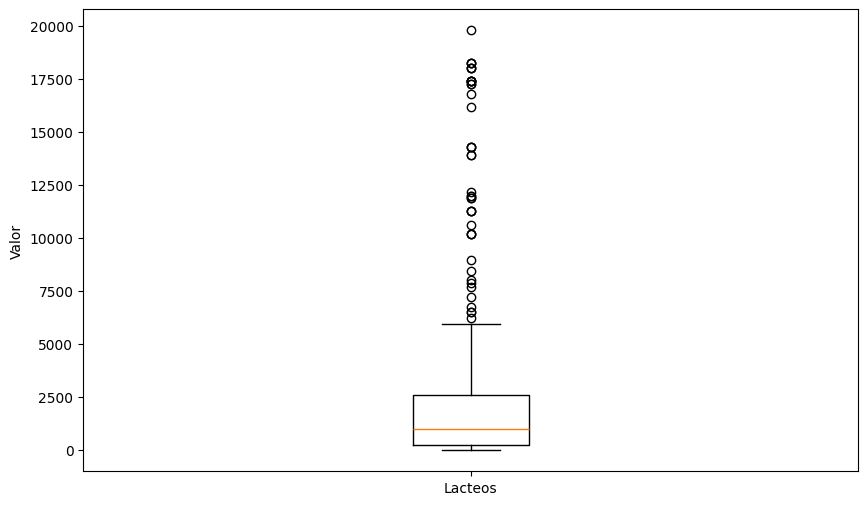

In [69]:
#Seu código aqui
# SELECIONANDO APENAS A CATEGORIA DE LACTEOS
lacteos = df.loc[df['Categoria'] == 'lacteos']

# QUANTIDADE DE REGISTROS
registros = lacteos['Preco_Normal'].count()
print(f'Quantidade de registros: {registros}\n')

# CALCULANDO A MÉDIA
valor_medio = lacteos['Preco_Normal'].mean().round(1)
print(f'Valor médio: {valor_medio}')

# CALCULANDO A QUANTIDADE DE VALORES OUTLIERS
outliers = lacteos['Preco_Normal'].loc[lacteos['Preco_Normal'] >= valor_medio * 2].count()
print(f'\nQuantidade de valores acima da média: {outliers}')

# VERIFICANDO VALORES ABAIXO DE 0
outliers_negativos = lacteos['Preco_Normal'].loc[lacteos['Preco_Normal'] < 0].count()
print(f'\nQuantidade de valores abaixo de zero: {outliers_negativos}\n')


# PLOTANDO O GRÁFICO
plt.figure(figsize = (10, 6))
plt.boxplot(lacteos['Preco_Normal'], tick_labels = ['Lacteos'])
plt.ylabel('Valor')

A partir do boxplot, foi possível a observar uma distribuição desigual, muito por conta da presença de cerca de 54 outliers (média x 2), portanto há um impacto significativo nas medidas de centralidade. Também foi possivel observar que há um grande volume de dados concentrados entre os valores de 0 e 2500.

Número de registros sem Outliers: 393

Valor médio com Outliers: 2385.2
Valor médio sem Outliers: 1127.9
Diferença de -111.5%

Mediana com Outliers: 989.0
Mediana sem Outliers: 609.0
Diferença de -62.4%

Desvio Padrão com Outliers: 3925.8
Desvio Padrão sem Outliers: 1124.7
Diferença de -249.1%



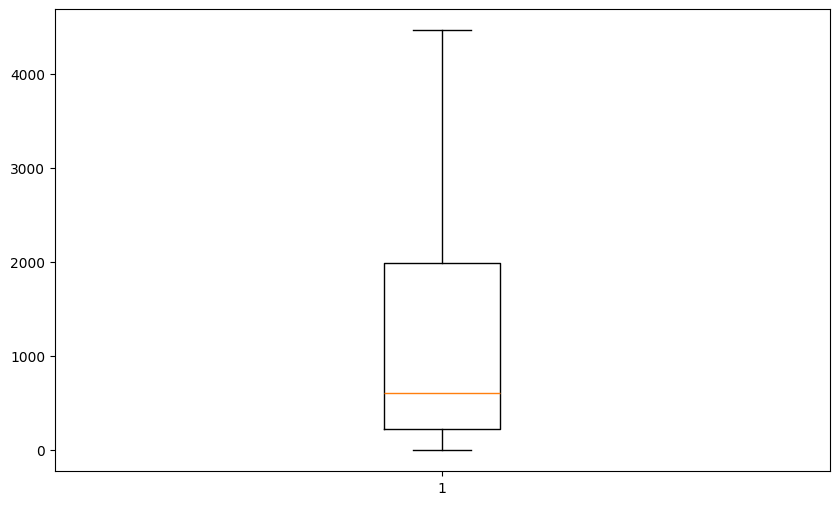

In [90]:
# CALCULANDO A MÉDIA
valor_medio = lacteos['Preco_Normal'].mean().round(1)

# REMOVENDO OS OUTLIERS
lacteos_sem_outliers = lacteos[lacteos['Preco_Normal'] < valor_medio * 2]
print(f'Número de registros sem Outliers: {lacteos_sem_outliers['Preco_Normal'].count()}\n')
valor_medio_sem_outliers = lacteos_sem_outliers['Preco_Normal'].mean().round(1)

# PLOTANDO NOVAMENTE O GRÁFICO
plt.figure(figsize = (10, 6))
plt.boxplot(lacteos_sem_outliers['Preco_Normal'])

# MEDIDAS DE CENTRALIDADE
# MEDIANA
mediana_com_outliers = lacteos['Preco_Normal'].median().round(1)
mediana_sem_outliers = lacteos_sem_outliers['Preco_Normal'].median().round(1)

# DESVIO PADRÃO
desvio_padrao_com_outliers = lacteos['Preco_Normal'].std().round(1)
desvio_padrao_sem_outliers = lacteos_sem_outliers['Preco_Normal'].std().round(1)

# EXIBINDO OS VALORES
# MÉDIA
print(f'Valor médio com Outliers: {valor_medio}')
print(f'Valor médio sem Outliers: {valor_medio_sem_outliers}')
print(f'Diferença de {((1-(valor_medio / valor_medio_sem_outliers)) * 100).round(1)}%\n')

# MEDIANA
print(f'Mediana com Outliers: {mediana_com_outliers}')
print(f'Mediana sem Outliers: {mediana_sem_outliers}')
print(f'Diferença de {((1-(mediana_com_outliers / mediana_sem_outliers)) * 100).round(1)}%\n')

# DESVIO PADRÃO
print(f'Desvio Padrão com Outliers: {desvio_padrao_com_outliers}')
print(f'Desvio Padrão sem Outliers: {desvio_padrao_sem_outliers}')
print(f'Diferença de {((1-(desvio_padrao_com_outliers / desvio_padrao_sem_outliers)) * 100).round(1)}%\n')


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

                    Categoria  Desconto
0                     lacteos    707.55
1  belleza-y-cuidado-personal    684.12
2                  congelados    603.28
3          comidas-preparadas    500.00
4                      frutas      0.00
5        instantaneos-y-sopas      0.00
6                    verduras      0.00


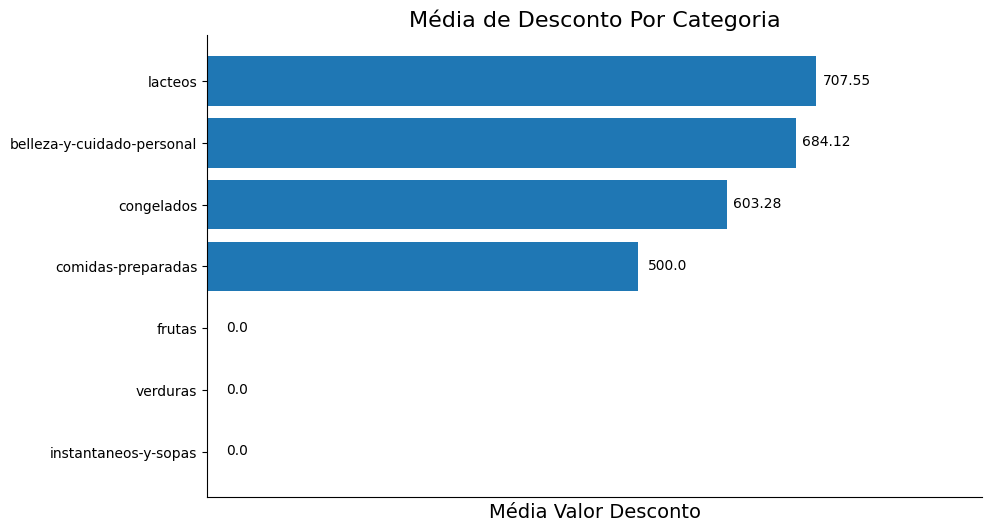

In [157]:
# Seu código aqui
# REMOVENDO PRODUTOS SEM DESCONTO ---> NÃO IMPACTAR A MÉDIA
produtos_com_desconto = df.loc[df['Desconto'] != 0]

# CALCULANDO A MÉDIA DO DESCONTO POR CATEGORIA
categoria_com_desconto = produtos_com_desconto.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by = 'Desconto', ascending = False).round(2)

# ENCONTRANDO AS CATEGORIAS QUE NÃO POSSUEM PRODUTOS COM DESCONTO
categoria_sem_desconto = df.groupby('Categoria')['Desconto'].mean().reset_index().round(2)

# FILTRANDO AS CATEGORIAS SEM DESCONTO
categoria_sem_desconto = categoria_sem_desconto.loc[categoria_sem_desconto['Desconto'] == 0]

# JUNTANDO AS CONSULTAS EM UMA TABELA
media_desconto_por_categoria = pd.concat([categoria_com_desconto, categoria_sem_desconto], ignore_index = True)
print(media_desconto_por_categoria)
media_desconto_por_categoria = media_desconto_por_categoria.sort_values(by = 'Desconto', ascending = True)

# CONSTRUINDO O GRÁFICO
plt.figure(figsize = (10, 6))
plt.barh(media_desconto_por_categoria['Categoria'], media_desconto_por_categoria['Desconto'])

# CUSTOMIZANDO
plt.title('Média de Desconto Por Categoria', fontsize = 16)
plt.xlabel('Média Valor Desconto', fontsize = 14)
plt.xticks(range(0, 1000, 100)) # AJUSTANDO O EIXO X
plt.xticks([])

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# RÓTULOS DE DADOS ---> É NECESSÁRIO INVERTER A ORDEM DO COMANDO X E Y NO GRÁFICO HORIZONTAL
for x, y in enumerate(media_desconto_por_categoria['Desconto']):
    plt.text(
        y + 35,
        x - 0.1,
        f'{y}',
        ha = 'center',
        va = 'bottom',
        fontsize = 10
    )

plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [167]:
# Seu código aqui
# FILTRANDO PRODUTOS SEM DESCONTO
produtos_com_desconto = df.loc[df['Desconto'] != 0]

# CALCULANDO A MÉDIA DE DESCONTO POR CATEGORIA E MARCA
media_desconto = produtos_com_desconto.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index().sort_values(by = 'Desconto', ascending = False).round(2)

# CRIANDO O GRÁFICO
fig = px.treemap(
    media_desconto, # ---> FONTE DE DADOS
    path = ['Categoria', 'Marca'], # ---> CATEGORIAS
    values = 'Desconto', # ---> VALORES
    title = 'Média Desconto Por Categoria e Marca', # ---> TÍTULO
    labels = {'Desconto': 'Média Desconto'}, # ---> RÓTULO DE DADOS
    color = 'Desconto', # ---> CRIA UM HEATMAP
    color_continuous_scale = 'Temps', # ---> ESCALA DE CORES
    width = 1200
)

fig.update_traces(
    textfont = dict(color = 'white')
)

fig.show()